 
### [Data link](https://www.kaggle.com/shahir/protein-data-set)



#### There are many biomolecules present in the body of living organism. These include DNA, RNA, proteins, sugar molecules, fats etc.
#### Protein is one of the most important biomolecule in our body and it serves vast ranges of functions.
####  DNA  gets transcribed to RNA and RNA is translated to protein.
#### Protein is a polymer of amino acids. Amino acids are the basic building blocks of protein.
#### There are 20 different amino acids that make most of the protein. They are denoted by 20 different alphabets.
#### [Amino acid and one letter code](http://www.fao.org/3/Y2775E/y2775e0e.htm)
#### Protein have various length.
#### The sequence with which amino acids combine to produce protein determines its function and structure.
#### Amino acids themselves have different chemical and physical properties.
#### So protein sequence is very important in determining its function.
#### There are different ways to find its function, experimentally.
#### In this project, I will try to determine proteins function using machine learning models


* There are two csv files for this project. There needs to be a merge done. Since we are only interested in proteins, we need to filter out other biomolecules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df1 = pd.read_csv("pdb_data_no_dups.csv")

#### This dataframe (df1) contains different data about different biomolecules (not only proteins) and how their structures were determined. This DF mostly deals with structure of the biomolecules and the techniques that were used. The most important feature of this DF is the classification column which is our target later on

In [4]:
df1.structureId.duplicated().sum()

490

In [5]:
df1.loc[df1.duplicated(), :]

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear


In [6]:
df1.shape

(141401, 14)

In [7]:
df1.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


#### Lets us have a look at this DF and its features. 
* structureId is a unique key for molecules (Primary Key)
* classification is the type of molecules it is and the role they play (our target)
* experimentalTechnique is the technique that the researchers used to determine the 3D structure of that molecule
* residueCount is the number of different residue present in the molecule
* resolution is the resolution of the 3D structure of the molecule and the technique they used
* structureMolecularWeight is the molecular weight of the molecule.
* crystallizationMethod is the method they used to get the crystals for different experimental technique. (crystallixation method is the initial step before the determination of 3D structure
* crystallizationTempK is the temperature at which the crystals were formed in Kelvin.
* densityMatthews is the density of the crystal
* densityPercentSol is the percent of solvent in the crystal
* pdbxDetails is the additional details of the crystals
* pH value is the pH of the crystal
* publicationYear is the year the structure was published

### Let us do some EDA  on df1

#### Lets check the publication year and the trend of protein structure determination

In [8]:
df1.structureId.nunique()

140911

In [9]:
df1['publicationYear'].min()

201.0

#### There seems to be a mistake in publication year. 201 is the year given which seems in correct.

In [10]:
py= df1.groupby("publicationYear").structureId.count()

#### Dropping the outlier 

In [11]:
py.drop(labels = 201.0, inplace = True)

Text(0,0.5,'Number of structure determined')

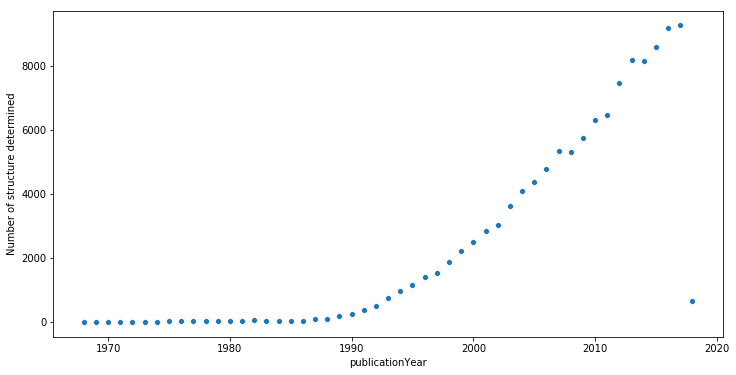

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = py.keys(), y = py )
plt.ylabel("Number of structure determined")


#### This figure clearly states the advancement in techniques used to determine the structure of the molecules. Since 1990, it has taken off

### Lets checkout classification

In [13]:
print ("There are {} different biomolecules present in the dataset".format(df1.classification.nunique()))

There are 5050 different biomolecules present in the dataset


In [14]:
clas = (df1.classification.value_counts())[0:20]
clas

HYDROLASE                                20915
TRANSFERASE                              15777
OXIDOREDUCTASE                           12494
LYASE                                     4329
IMMUNE SYSTEM                             4075
TRANSCRIPTION                             3691
TRANSPORT PROTEIN                         3251
SIGNALING PROTEIN                         2904
HYDROLASE/HYDROLASE INHIBITOR             2677
ISOMERASE                                 2602
VIRAL PROTEIN                             2320
LIGASE                                    2133
PROTEIN BINDING                           1892
DNA                                       1765
STRUCTURAL GENOMICS, UNKNOWN FUNCTION     1738
MEMBRANE PROTEIN                          1731
TRANSFERASE/TRANSFERASE INHIBITOR         1695
DNA BINDING PROTEIN                       1517
RIBOSOME                                  1462
METAL BINDING PROTEIN                     1383
Name: classification, dtype: int64

Text(0.5,1,'Top 20 Different molecules in the database')

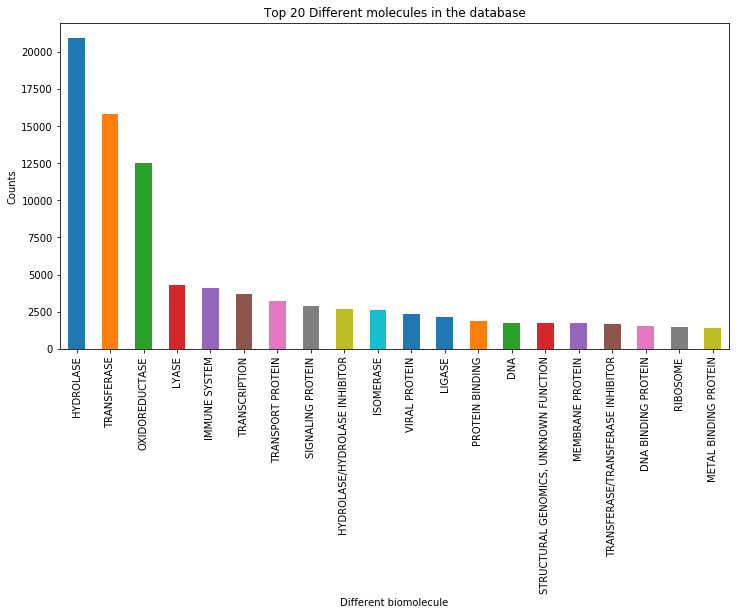

In [15]:
plt.figure(figsize=(12,6))
clas.plot(kind = "bar")
plt.ylabel("Counts")
plt.xlabel("Different biomolecule")
plt.title("Top 20 Different molecules in the database")

### The classification columns has different molecules. Out of which (Hydrolase, Transferase, Oxidoreductase, Lyase) are all enzymes. Important to note that ALL ENZYMES ARE PROTEINS BUT NOT ALL PROTEINS ARE ENZYMES.
#### We can also see that there are DNA structures in this dataframe also, which we need to get rid of.

### Let us checkout macromoleculetype

In [16]:
df1.macromoleculeType.nunique()

13

### Among macromolecules that are present, majority are proteins. There are many DNA and RNA also as show in the piechart below.

In [17]:
df1.macromoleculeType.value_counts()

Protein                       127798
Protein#DNA                     4176
Protein#RNA                     2162
DNA                             1744
RNA                             1295
Protein#DNA#RNA                  250
DNA/RNA Hybrid                    58
DNA#RNA                           51
Protein#DNA#DNA/RNA Hybrid        34
RNA#DNA/RNA Hybrid                27
Protein#DNA/RNA Hybrid            19
DNA#DNA/RNA Hybrid                13
Protein#RNA#DNA/RNA Hybrid         9
Name: macromoleculeType, dtype: int64

### Making a piechart of the macromolecule type. Piechart shows top 5 macromolecules in the dataset

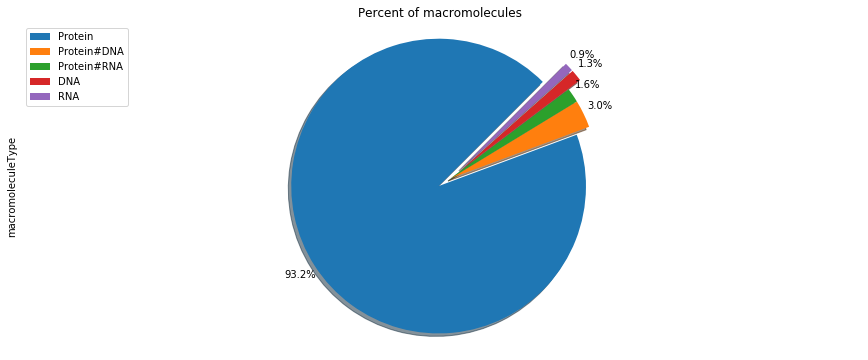

In [18]:
explode_list = [0.1, 0, 0, 0.1, 0.1]
plt.figure(figsize=(15,6))
df1.macromoleculeType.value_counts()[0:5].plot(kind = 'pie', autopct='%1.1f%%',labels=None,
                                         pctdistance=1.12, explode = explode_list, startangle=45,
                                              shadow = True)
plt.legend(df1.macromoleculeType.value_counts()[0:5].index, loc='upper left') 
plt.axis('equal') 
plt.title("Percent of macromolecules")
plt.show()


### Protein#DNA means it is a hybrid structure of protein and DNA

## MacromoleculeType is the biomolecules (protein, DNA, RNA) and classification columns denotes furthur classification of biomolecules. For eg, what kinds of protein it is and what role does it play

### X-Ray Diffraction is the top Experimental technique to determine the structure of the macromolecule

In [19]:
df1.experimentalTechnique.value_counts()[0:5]

X-RAY DIFFRACTION           126432
SOLUTION NMR                 12268
ELECTRON MICROSCOPY           2252
SOLID-STATE NMR                 99
ELECTRON CRYSTALLOGRAPHY        74
Name: experimentalTechnique, dtype: int64

### Since most of other columns deals with experimental techniques for 3D structure determination and doesnot relate to protein sequence and function. I will skip it

### Lets have a look at the other dataset

In [20]:
df2 = pd.read_csv("pdb_data_seq.csv")
df2.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


### This dataframe has info about macromolecules sequence. Like protein DNA/RNA also has sequence which are made up of nucleotide(its building block), represented by A,T,C,G (only four)
* structureId is the primary key which can also be found in df1 dataframe
* chainId is represents id of the different chain that a protein possesses. Protein can be made up of different chains
* sequence is the protein sequence which is represented by one letter alphabetical code for each amino acid. Its order is valuable to determine protein function and classification.
* residueCount is the same as df1
* macromleuleType represents the type of biomolecule it is (Protein, DNA, RNA, hybrids)

### The aim of this project is to determine the classification of protein through the use of their sequence.

In [21]:
df2.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [22]:
df2.loc[df2.duplicated(), :]

,structureId,chainId,sequence,residueCount,macromoleculeType


In [23]:
df2.structureId.nunique()

140250

In [24]:
df2.shape

(467304, 5)

In [25]:
df2.macromoleculeType.value_counts()

Protein                       345180
Protein#RNA                    56226
Protein#DNA                    21303
DNA                             3784
Protein#DNA#RNA                 2712
RNA                             2389
Protein#RNA#DNA/RNA Hybrid       304
Protein#DNA#DNA/RNA Hybrid       159
DNA/RNA Hybrid                   141
DNA#RNA                          121
RNA#DNA/RNA Hybrid                74
Protein#DNA/RNA Hybrid            68
DNA#DNA/RNA Hybrid                26
Name: macromoleculeType, dtype: int64

### We can see that like the previous dataframe df1, it has more proteins than DNA, RNA or any other kinds of hybrid.

### Now let us merge the two dataframe in order to a final DF. The merge should be a inner merge on structureId

In [26]:
df = df1.merge(df2, how ="inner", on ="structureId")

In [27]:
df.structureId.duplicated().sum()

330899

In [28]:
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount_y,macromoleculeType_y
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24,DNA
3,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,B,CGCGAATTCGCG,24,DNA
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [29]:
df.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType_x', 'residueCount_x', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear', 'chainId', 'sequence',
       'residueCount_y', 'macromoleculeType_y'],
      dtype='object')

#### Dropping duplicate columns which were common in both dataframe

In [30]:
df.drop(['residueCount_y', 'macromoleculeType_y'], axis =1, inplace = True)

### Since this DF contains different macromolecules and we are only inetrested in protein. Let us make a Df which only has protein as a macromolecule

In [31]:
df = df[df['macromoleculeType_x'] == "Protein"]

In [32]:
df.head(50)

,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
8,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
11,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
12,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
15,104L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,332,2.80,37541.04,NaN,NaN,3.04,59.49,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...
16,104L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,332,2.80,37541.04,NaN,NaN,3.04,59.49,NaN,NaN,1993.0,B,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...
17,104M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,153,1.71,18030.63,NaN,NaN,1.87,34.30,"3.0 M AMMONIUM SULFATE, UNBUFFERED, pH 7.0",7.0,1999.0,A,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...
22,105M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,153,2.02,18030.63,NaN,NaN,1.83,33.00,"3.0 M AMMONIUM SULFATE, UNBUFFERED, pH 9.0",9.0,1999.0,A,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...
27,106M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.99,18181.84,NaN,NaN,3.05,59.70,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [33]:
#df[["structureId", "chainId","sequence"]]

In [34]:
df.sequence.duplicated().sum()

257241

In [35]:
df.structureId.duplicated().sum()

218938

In [36]:
df.loc[df.duplicated(), :]

,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence


In [37]:
df.shape

(346325, 16)

In [38]:
df['macromoleculeType_x'].nunique()

1

### Now we have a dataframe with only protein as a macromolecule. now let us see if there are any missing data

In [39]:
df.isnull().sum()

structureId                      0
classification                   1
experimentalTechnique            0
macromoleculeType_x              0
residueCount_x                   0
resolution                   16093
structureMolecularWeight         0
crystallizationMethod       105728
crystallizationTempK        102391
densityMatthews              38844
densityPercentSol            38710
pdbxDetails                  51628
phValue                      87195
publicationYear              50962
chainId                          2
sequence                         3
dtype: int64

### Since our main feature is sequence, and there are only 3 sequence missing, I will drop those three rows. Since replacing a sequence doesnot make sense. Sequence is specific for a preotein, replacing doesnot make sense. This same logic applies for classification also, which as one value missing

In [40]:
df = df[pd.notnull(df['sequence'])]

In [41]:
df = df[pd.notnull(df['classification'])]

In [42]:
df.shape

(346321, 16)

In [43]:
df.isnull().sum()

structureId                      0
classification                   0
experimentalTechnique            0
macromoleculeType_x              0
residueCount_x                   0
resolution                   16093
structureMolecularWeight         0
crystallizationMethod       105728
crystallizationTempK        102391
densityMatthews              38844
densityPercentSol            38710
pdbxDetails                  51628
phValue                      87194
publicationYear              50962
chainId                          2
sequence                         0
dtype: int64

### Looking at the sequence, I found that some of them contains the letter 'X', which denotes unknown amino acid. This doesnot add anything to the sequence. So, let's drop the rows with many Xs in its sequence

In [44]:
df.loc[df['sequence'].str.contains('(^XXXX)+')]

C:\Users\Pralav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
2321,1ATI,PROTEIN BIOSYNTHESIS,X-RAY DIFFRACTION,Protein,1063,2.75,120874.53,NaN,NaN,3.52,61.00,pH 7.5,7.5,1995.0,C,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2322,1ATI,PROTEIN BIOSYNTHESIS,X-RAY DIFFRACTION,Protein,1063,2.75,120874.53,NaN,NaN,3.52,61.00,pH 7.5,7.5,1995.0,D,XXXXXXXXXXXXXXXX
2325,1ATI,PROTEIN BIOSYNTHESIS,X-RAY DIFFRACTION,Protein,1063,2.75,120874.53,NaN,NaN,NaN,NaN,NaN,NaN,1995.0,C,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2326,1ATI,PROTEIN BIOSYNTHESIS,X-RAY DIFFRACTION,Protein,1063,2.75,120874.53,NaN,NaN,NaN,NaN,NaN,NaN,1995.0,D,XXXXXXXXXXXXXXXX
3622,1BCC,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,2048,3.16,467225.78,NaN,NaN,3.83,67.90,"20MM KMES PH6.7, 75MM NACL, 10% GLYCEROL, AND ...",6.7,1998.0,I,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
5553,1C51,PHOTOSYNTHESIS/ELECTRON TRANSPORT,X-RAY DIFFRACTION,Protein,1844,4.00,223365.34,NaN,NaN,5.80,80.00,pH 6.4,6.4,1999.0,A,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
5554,1C51,PHOTOSYNTHESIS/ELECTRON TRANSPORT,X-RAY DIFFRACTION,Protein,1844,4.00,223365.34,NaN,NaN,5.80,80.00,pH 6.4,6.4,1999.0,B,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
5555,1C51,PHOTOSYNTHESIS/ELECTRON TRANSPORT,X-RAY DIFFRACTION,Protein,1844,4.00,223365.34,NaN,NaN,5.80,80.00,pH 6.4,6.4,1999.0,C,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
5556,1C51,PHOTOSYNTHESIS/ELECTRON TRANSPORT,X-RAY DIFFRACTION,Protein,1844,4.00,223365.34,NaN,NaN,5.80,80.00,pH 6.4,6.4,1999.0,D,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
5557,1C51,PHOTOSYNTHESIS/ELECTRON TRANSPORT,X-RAY DIFFRACTION,Protein,1844,4.00,223365.34,NaN,NaN,5.80,80.00,pH 6.4,6.4,1999.0,E,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...


In [45]:
index_to_drop = df.loc[df['sequence'].str.contains('(^XXXX)+')].index

C:\Users\Pralav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [46]:
df.drop(index = index_to_drop, inplace = True)

In [47]:
df.shape

(344956, 16)

### Most of the columns have no relation to the classification(function) of the protein (because they are related to the techniques used to get the structure). I am dropping those columns and only keep the sequence as it is the main feature to classify protein

In [48]:
df_prot = df[["structureId", "classification", "sequence", "chainId"]]

In [49]:
df_prot.shape

(344956, 4)

In [50]:
df_prot.dtypes

structureId       object
classification    object
sequence          object
chainId           object
dtype: object

### Making a column for the length of the protein sequence. Protein length is given by the total number of amino acids in the sequence.

In [51]:
df_prot["seq_length"] = df_prot["sequence"].apply(len)

C:\Users\Pralav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Frequency')

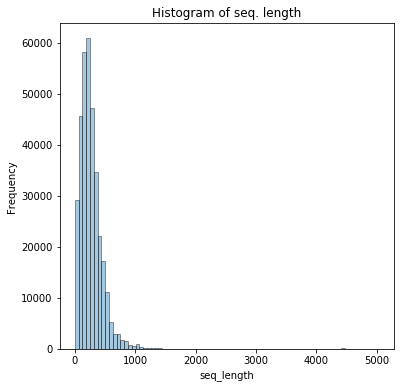

In [52]:
plt.figure(figsize=(6,6))
sns.distplot(df_prot["seq_length"], bins = 80, kde = False, hist_kws={'edgecolor':'k'})
plt.title("Histogram of seq. length")
plt.ylabel("Frequency")

### The sequence length of all the proteins has a median 250 - 300 amino acid long.

### Let us have a look at the most prevalent types of protein present in this dataframe. It seems like the top 5 proteins are all enzymes

In [53]:
clas_prot = df_prot.groupby("classification").structureId.count().sort_values(ascending = False)[0:25]

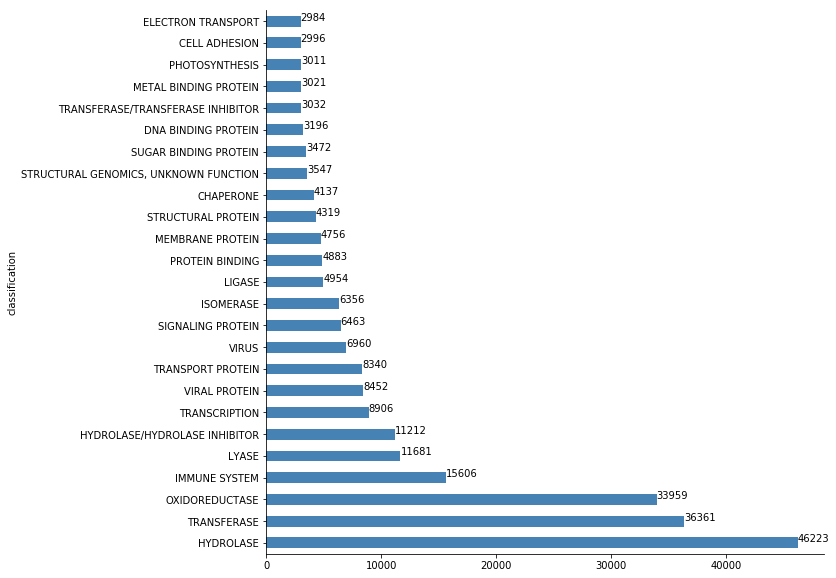

In [54]:
ax = clas_prot.plot(kind = "barh", figsize=(10,10), color='steelblue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i, v in enumerate(clas_prot):
    ax.text(v + 3, i + .045, str(v), color='black')
    
plt.show()

### this result replicates what was seen above earlier. But this only contains protein

In [55]:
clas_prot.keys()

Index(['HYDROLASE', 'TRANSFERASE', 'OXIDOREDUCTASE', 'IMMUNE SYSTEM', 'LYASE',
       'HYDROLASE/HYDROLASE INHIBITOR', 'TRANSCRIPTION', 'VIRAL PROTEIN',
       'TRANSPORT PROTEIN', 'VIRUS', 'SIGNALING PROTEIN', 'ISOMERASE',
       'LIGASE', 'PROTEIN BINDING', 'MEMBRANE PROTEIN', 'STRUCTURAL PROTEIN',
       'CHAPERONE', 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION',
       'SUGAR BINDING PROTEIN', 'DNA BINDING PROTEIN',
       'TRANSFERASE/TRANSFERASE INHIBITOR', 'METAL BINDING PROTEIN',
       'PHOTOSYNTHESIS', 'CELL ADHESION', 'ELECTRON TRANSPORT'],
      dtype='object', name='classification')

In [56]:
leng = df_prot.groupby("classification").seq_length.mean().get(clas_prot.keys())

Text(0,0.5,'Length of sequence')

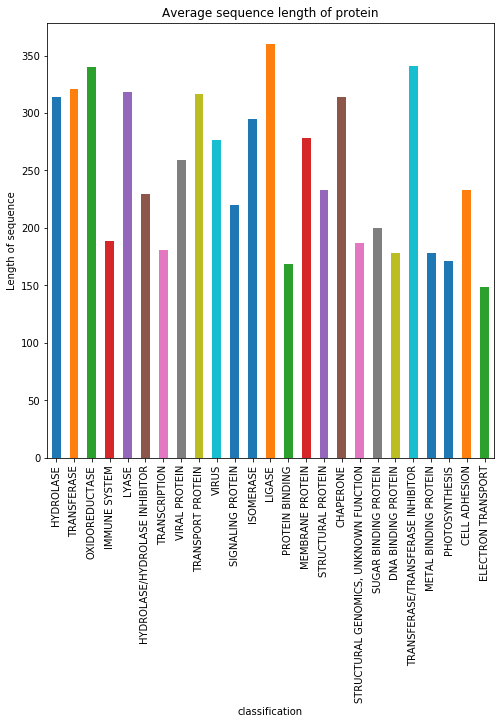

In [57]:
leng.plot(kind = "bar", figsize=(8,8))
plt.title("Average sequence length of protein")
plt.ylabel("Length of sequence")

### Since there are 4461 different values for classification. I am going to take top 25 proteins whose frequency are higher

In [58]:
df_prot.classification.nunique()

4461

In [59]:
df_prot.structureId.nunique()

127336

### The top most prevalent (25) protein types (classification) are taken as a final filtering process to narrow down the classification types

In [60]:
df_prot_fin = df_prot[df_prot['classification'].isin(clas_prot.keys())]


In [61]:
df_prot_fin["classification"].nunique()

25

In [62]:
df_prot_fin.shape

(248827, 5)

### Train test split and Vectorization

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
X_train, X_test,y_train,y_test = train_test_split(df_prot_fin['sequence'], df_prot_fin['classification'], test_size = 0.3, 
                                                  random_state = 101)
bow_transformer = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4)) #used 4 grams
bow_transformer.fit(X_train)
vec = bow_transformer.transform(X_train)

In [66]:
len(bow_transformer.vocabulary_)

172806

In [67]:
vec.shape

(174178, 172806)

In [68]:
vec1 = bow_transformer.transform(X_test)

In [69]:
vec1.shape

(74649, 172806)

### TF-IDF Vectorization

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
tfidf_transformer = TfidfVectorizer(analyzer = "char_wb", ngram_range= (4,4))


In [72]:
tfidf_transformer.fit(X_train)

TfidfVectorizer(analyzer='char_wb', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(4, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [73]:
vector = tfidf_transformer.transform(X_train)

In [74]:
vector.shape

(174178, 172806)

In [75]:
vector1 = tfidf_transformer.transform(X_test)

In [76]:
vector1.shape

(74649, 172806)

In [ ]:
### I have some problems:
## The vector (BOW and TF-IDF) produced is very large, so if I try to model it. It freezes, doesnot work.
## This is a multiclass classification, I picked top 25 proteins which serves as a target class. May be that needs to be reduced.
## I was checking different classifier to model, but only MultinomialNB works.
## I have not tried word2vec yet, I need to read upon it more to get the intuition about. I will do that by today.
## people have used keras to tackle this problem, hopefully that will work.

### Modelling

In [77]:
from sklearn.naive_bayes import MultinomialNB

In [78]:
model = MultinomialNB()

In [79]:
model.fit(vec, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [80]:
# Using bag of words vector
pred = model.predict(vec1)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [82]:
print(classification_report(y_test, pred))

                                       precision    recall  f1-score   support

                        CELL ADHESION       0.72      0.80      0.76       921
                            CHAPERONE       0.91      0.80      0.85      1247
                  DNA BINDING PROTEIN       0.70      0.80      0.74       955
                   ELECTRON TRANSPORT       0.52      0.75      0.62       876
                            HYDROLASE       0.79      0.79      0.79     13867
        HYDROLASE/HYDROLASE INHIBITOR       0.67      0.79      0.72      3428
                        IMMUNE SYSTEM       0.91      0.79      0.84      4672
                            ISOMERASE       0.94      0.87      0.90      1952
                               LIGASE       0.90      0.85      0.87      1522
                                LYASE       0.94      0.87      0.90      3530
                     MEMBRANE PROTEIN       0.70      0.70      0.70      1398
                METAL BINDING PROTEIN       0.69   

In [83]:
print(accuracy_score(y_test, pred))

0.7918659325644014


### Using Tf-idf vector

## MultinomialNB

In [84]:
model1 = MultinomialNB()

In [85]:
model1.fit(vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [86]:
pred1 = model1.predict(vector1)

In [87]:
print(classification_report(y_test, pred1))

                                       precision    recall  f1-score   support

                        CELL ADHESION       0.83      0.36      0.50       921
                            CHAPERONE       0.92      0.67      0.78      1247
                  DNA BINDING PROTEIN       0.86      0.34      0.49       955
                   ELECTRON TRANSPORT       0.85      0.47      0.60       876
                            HYDROLASE       0.62      0.85      0.72     13867
        HYDROLASE/HYDROLASE INHIBITOR       0.73      0.74      0.73      3428
                        IMMUNE SYSTEM       0.90      0.82      0.86      4672
                            ISOMERASE       0.96      0.61      0.74      1952
                               LIGASE       0.89      0.46      0.60      1522
                                LYASE       0.95      0.75      0.84      3530
                     MEMBRANE PROTEIN       0.78      0.46      0.58      1398
                METAL BINDING PROTEIN       0.84   

In [88]:
print(accuracy_score(y_test, pred1))

0.7328430387547054


In [89]:
bow_transformer1 = CountVectorizer(analyzer = 'char_wb', ngram_range = (3,3)) #used 3 grams
bow_transformer1.fit(X_train)
vect = bow_transformer.transform(X_train)

In [90]:
vect.shape

(174178, 172806)

In [92]:
vect1 = bow_transformer.transform(X_test)

In [95]:
model33 = MultinomialNB()

In [96]:
model33.fit(vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [97]:
ypred33 = model.predict(vect1)

In [98]:
print(accuracy_score(y_test, ypred33))

0.7918659325644014


In [99]:
print(classification_report(y_test, ypred33))

                                       precision    recall  f1-score   support

                        CELL ADHESION       0.72      0.80      0.76       921
                            CHAPERONE       0.91      0.80      0.85      1247
                  DNA BINDING PROTEIN       0.70      0.80      0.74       955
                   ELECTRON TRANSPORT       0.52      0.75      0.62       876
                            HYDROLASE       0.79      0.79      0.79     13867
        HYDROLASE/HYDROLASE INHIBITOR       0.67      0.79      0.72      3428
                        IMMUNE SYSTEM       0.91      0.79      0.84      4672
                            ISOMERASE       0.94      0.87      0.90      1952
                               LIGASE       0.90      0.85      0.87      1522
                                LYASE       0.94      0.87      0.90      3530
                     MEMBRANE PROTEIN       0.70      0.70      0.70      1398
                METAL BINDING PROTEIN       0.69   